In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline



forest = pd.read_csv('./csv/forest.csv', sep = ',')
forest_area = pd.read_csv('./csv/forest_area.csv', sep = ',')
brazil_loss = pd.read_csv('./csv/brazil_loss.csv', sep = ',')
soybean_use = pd.read_csv('./csv/soybean_use.csv', sep = ',')
vegetable_oil = pd.read_csv('./csv/vegetable_oil.csv', sep = ',')
population = pd.read_csv('./csv/population.csv')
pd.set_option("max_rows", 200)
def tamanhoPlot(x, y):
    fig_dims = (x, y)
    fig, ax = plt.subplots(figsize=fig_dims)
    return ax

In [3]:
def filtro(df):
    df1 = df[(df.Código.notna()) & (df['Entidade'] != 'World')]
    df1.dropna(inplace=True)
    return df1

In [4]:
data = filtro(forest)
data.sort_values(['Conversão_líquida_de_floresta'], inplace=True)
data

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Entidade,Código,Ano,Conversão_líquida_de_floresta
47,Brazil,BRA,2000,-3950790.0
46,Brazil,BRA,1990,-3780940.0
195,Indonesia,IDN,1990,-1726500.0
48,Brazil,BRA,2010,-1539180.0
49,Brazil,BRA,2015,-1453040.0
...,...,...,...,...
14,Australia,AUS,2010,709680.0
83,China,CHN,2010,1936770.0
84,China,CHN,2015,1936790.0
81,China,CHN,1990,1986000.0


In [5]:
data_area = forest_area[(forest_area.Código.notna()) &(forest_area['Entidade'] != 'World')]
data_f = filtro(forest)
data_area.sort_values('Área_de_Floresta', ascending=False, inplace=True)

data = pd.merge(data_f, data_area)
data.sort_values(['Área_de_Floresta'], ascending=False, inplace=True)
data_vo = filtro(vegetable_oil)
data_test = data_vo.groupby(['Entidade','Código','Ano']).Produção_Óleo.sum().reset_index()
data = pd.merge(data, data_test)



/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# População mundial


<AxesSubplot:>

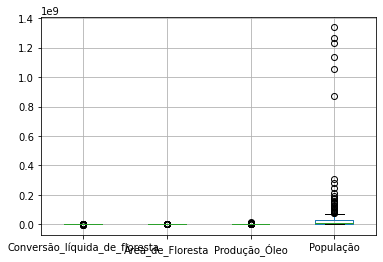

In [28]:

data_string, data_value = data.iloc[:,:3], data.iloc[:,3:]
data_value.boxplot()     